In [102]:
from __future__ import division
import scipy.stats as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### parameters

In [89]:
group_one_size = 40
group_two_size = 30

In [90]:
null = sp.bernoulli(.3)
alt = sp.bernoulli(.7)

### data

NOTE: don't need to model the alternative. really just need to see if data is low probability under null.

In [91]:
null_data = null.rvs(group_one_size)
alt_data = alt.rvs(group_two_size)

In [92]:
all_data = np.concatenate((null_data, alt_data))

In [93]:
test_stat = np.mean(null_data) - np.mean(alt_data)

### parametric sampling distribution

#### assume null is true

In [94]:
num_simulations = 1000

In [95]:
test_stat_sim_array = []

for _ in range(num_simulations):
    
    #draw two groups of samples analogous to data
    null_one_sim = null.rvs(group_one_size)
    null_two_sim = null.rvs(group_two_size)
    
    #calc test stat
    test_stat_sim = np.mean(null_one_sim) - np.mean(null_two_sim)
    
    #collect test stat simulations
    test_stat_sim_array.append(test_stat_sim)

### hypothesis test

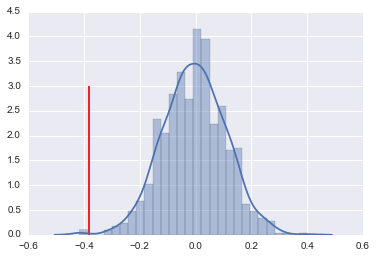

In [96]:
ax = sns.distplot(test_stat_sim_array)
ax.vlines(test_stat, 0, 3, 'red')

In [97]:
np.where(test_stat_sim_array <= test_stat)[0].size/len(test_stat_sim_array)

0.003

does this hypothesis/significance test tell us anything? does it give us actionable information? even though it's not about effect size -- at least not directly. depends upon how we set up the alternative hypothesis -- maybe we can still learn about underlying model?

### resampling sampling distribution

In [98]:
test_stat_sim_array = []

for _ in range(num_simulations):
    
    #draw two groups of samples analogous to data
    null_one_sim = np.random.choice(all_data, size=group_one_size)
    null_two_sim = np.random.choice(all_data, size=group_two_size)
    
    #calc test stat
    test_stat_sim = np.mean(null_one_sim) - np.mean(null_two_sim)
    
    #collect test stat simulations
    test_stat_sim_array.append(test_stat_sim)

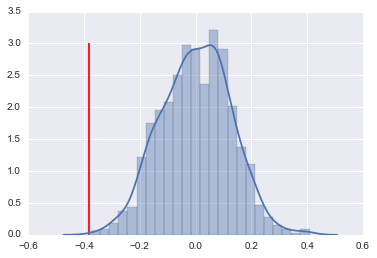

In [99]:
ax = sns.distplot(test_stat_sim_array)
ax.vlines(test_stat, 0, 3, 'red')

In [100]:
np.where(test_stat_sim_array <= test_stat)[0].size/len(test_stat_sim_array)

0.0